In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from natsort import natsorted 


In [18]:
# 직접 짠 코드
directory = 'TextureSurvey_csv'

dataframes = []
for filename in natsorted(os.listdir(directory)):  
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df.drop(df.columns[0], axis=1, inplace=True)
        dataframes.append(df)

result = dataframes[0].iloc[1]
for i in np.arange(len(dataframes)-1) :
    result = pd.concat([result,dataframes[i+1].iloc[1]],axis=1)
result.columns=np.arange(len(dataframes))+1

data_AllFabrics = []

FiberData=pd.read_csv('FiberData.csv',index_col=0)
FiberNumber=FiberData.index

FiberNumber_NaNDeleted=[x for x in FiberData.index if not np.isnan(x)]


for j in np.arange(len(FiberNumber)):
    data_Fabric = dataframes[0].iloc[j]
    for i in np.arange(len(dataframes)-1) :
        data_Fabric = pd.concat([data_Fabric,dataframes[i+1].iloc[j]],axis=1)
    data_AllFabrics.append(data_Fabric)
    

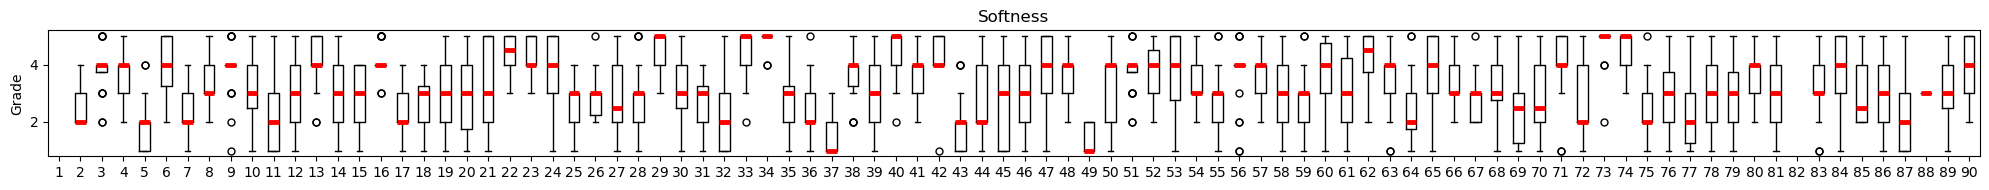

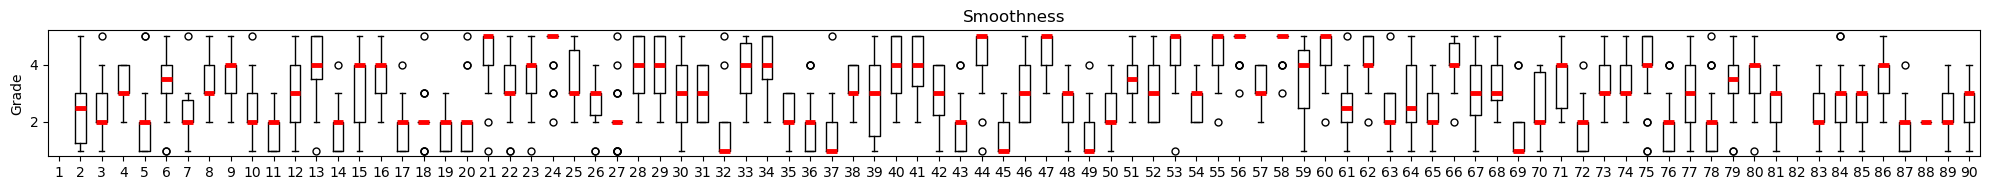

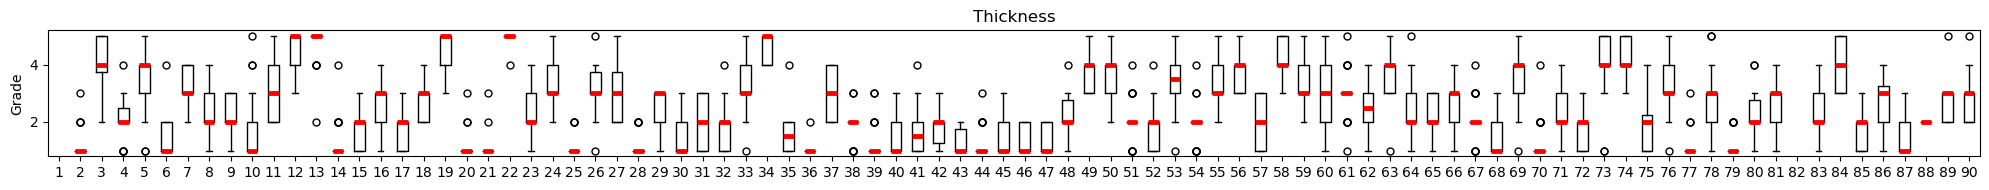

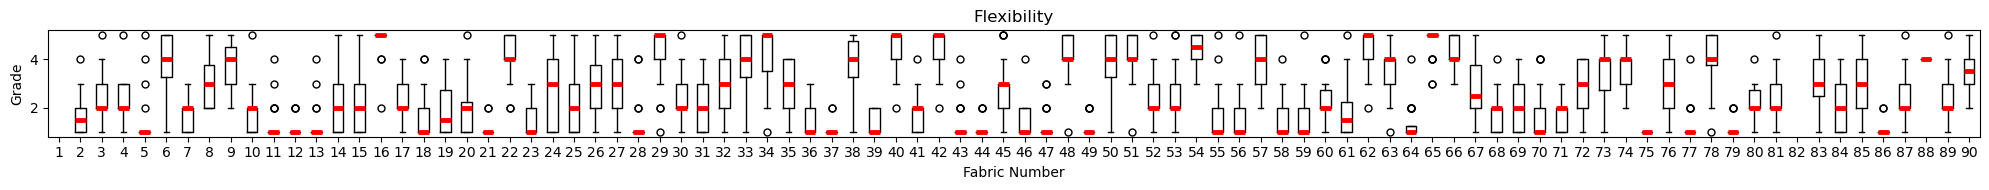

In [35]:
softness_AllFabrics=[]
for i in np.arange(len(data_AllFabrics)):
    softness_fabric=data_AllFabrics[i].iloc[0].apply(pd.to_numeric)
    softness_fabric_NaNDeleted=[x for x in softness_fabric if not np.isnan(x)]
    softness_AllFabrics.append(softness_fabric_NaNDeleted)
    
smoothness_AllFabrics=[]
for i in np.arange(len(data_AllFabrics)):
    smoothness_fabric=data_AllFabrics[i].iloc[1].apply(pd.to_numeric)
    smoothness_fabric_NaNDeleted=[x for x in smoothness_fabric if not np.isnan(x)]
    smoothness_AllFabrics.append(smoothness_fabric_NaNDeleted)

thickness_AllFabrics=[]
for i in np.arange(len(data_AllFabrics)):
    thickness_fabric=data_AllFabrics[i].iloc[2].apply(pd.to_numeric)
    thickness_fabric_NaNDeleted=[x for x in thickness_fabric if not np.isnan(x)]
    thickness_AllFabrics.append(thickness_fabric_NaNDeleted)

elasiticy_AllFabrics=[]
for i in np.arange(len(data_AllFabrics)):
    elasiticy_fabric=data_AllFabrics[i].iloc[3].apply(pd.to_numeric)
    elasiticy_fabric_NaNDeleted=[x for x in elasiticy_fabric if not np.isnan(x)]
    elasiticy_AllFabrics.append(elasiticy_fabric_NaNDeleted)

medianprops = dict(linestyle='-.', linewidth=3.5, color='red')
flierprops = dict(marker='o', markersize=5)


plt.figure(figsize=(20, 2))
plt.boxplot(softness_AllFabrics, medianprops=medianprops, flierprops=flierprops)
plt.ylabel('Grade')
plt.title('Softness')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 2))
plt.boxplot(smoothness_AllFabrics, medianprops=medianprops, flierprops=flierprops)
plt.ylabel('Grade')
plt.title('Smoothness')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 2))
plt.boxplot(thickness_AllFabrics, medianprops=medianprops, flierprops=flierprops)
plt.ylabel('Grade')
plt.title('Thickness')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 2))
plt.boxplot(elasiticy_AllFabrics, medianprops=medianprops, flierprops=flierprops)
plt.ylabel('Grade')
plt.title('Flexibility')
plt.xlabel('Fabric Number')
plt.tight_layout()
plt.show()